In [ ]:
!pip install keras-ocr

In [ ]:
import datetime
import string
import math
import os
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sklearn.model_selection


In [ ]:
caracteres_braille = {
    'a':'⠁','b':'⠃','c':'⠉','d':'⠙','e':'⠑','f':'⠋',
    'g':'⠛','h':'⠓','i':'⠊','j':'⠚','k':'⠅','l':'⠇',
    'm':'⠍','n':'⠝','o':'⠕','p':'⠏','q':'⠟','r':'⠗',
    's':'⠎','t':'⠞','u':'⠥','v':'⠧','w':'⠺','x':'⠭',
    'y':'⠽','z':'⠵','á':'⠷','é':'⠿','í':'⠌','ó':'⠬',
    'ú':'⠾','à':'⠫','â':'⠡','ê':'⠣','ô':'⠹','ã':'⠜',
    'õ':'⠪','ç':'⠯',',':'⠂','.':'⠲',' ':' '
}
str_braille = "⠁⠃⠉⠙⠑⠋⠛⠓⠊⠚⠅⠇⠍⠝⠕⠏⠟⠗⠎⠞⠥⠧⠺⠭⠽⠵⠷⠿⠌⠬⠾⠫⠡⠣⠹⠜⠪⠯⠂⠲"
              # "⠁⠂⠃⠅⠇⠉⠊⠋⠌⠍⠎⠏⠑⠓⠕⠗⠙⠚⠛⠜⠝⠞⠟⠡⠣⠥⠧⠪⠫⠬⠭⠯⠲⠵⠷⠹⠺⠽⠾⠿"
braille_ordenado = ''.join(sorted(list(str_braille)))
print(braille_ordenado)

⠁⠂⠃⠅⠇⠉⠊⠋⠌⠍⠎⠏⠑⠓⠕⠗⠙⠚⠛⠜⠝⠞⠟⠡⠣⠥⠧⠪⠫⠬⠭⠯⠲⠵⠷⠹⠺⠽⠾⠿


#### Função que converte um texto alfanumérico para braile

In [ ]:
def codificador_braille(frase):
    for letra, braille in caracteres_braille.items():
        for i in range(len(frase)):
            if (letra == frase[i]):
                frase[i] = braille
    frase = "".join(frase)
    return frase

#### Função que converte um texto em braille para alfanumérico

In [ ]:
def decodificador_braille(frase):
    for letra, braille in caracteres_braille.items():
        for i in range(len(frase)):
            if (braille == frase[i]):
                frase[i] = letra
    frase = "".join(frase)
    return frase

In [ ]:
frase = list(input("Insira a frase que será convertida para braille:\n"))
print("\nEsta é a sua frase convertida para braille:")
print(codificador_braille(frase))

Insira a frase que será convertida para braille:
acabou

Esta é a sua frase convertida para braille:
⠁⠉⠁⠃⠕⠥


In [ ]:
frase = list(input("Insira a frase em braille para ser decodificada:\n"))
print("\nEsta é a sua frase decodificada:")
print(decodificador_braille(frase))

Insira a frase em braille para ser decodificada:
⠋⠗⠁⠝⠉⠊⠝⠊⠇⠙⠕

Esta é a sua frase decodificada:
francinildo


In [ ]:
gabaritos = np.array([
                      "⠁⠑⠊⠕⠥","⠋⠗⠁⠝⠉⠊⠝⠊⠇⠙⠕","⠁⠇⠽⠎⠎⠕⠝","⠊⠥⠗⠽",
                      "⠏⠗⠕⠉⠑⠎⠎⠁⠍⠑⠝⠞⠕ ⠙⠊⠛⠊⠞⠁⠇ ⠙⠑ ⠊⠍⠁⠛⠑⠝⠎",
                      "⠃⠗⠁⠊⠇⠇⠑","⠧⠁⠊ ⠙⠁⠗ ⠉⠑⠗⠞⠕","⠊⠍⠁⠛⠑⠍",
                      "⠗⠑⠎⠥⠇⠞⠁⠙⠕","⠁ ⠃ ⠉ ⠙ ⠑ ⠋ ⠛","⠗⠁⠯⠜⠕",
                      "⠞⠑⠭⠞⠕ ⠑⠍ ⠃⠗⠁⠊⠇⠇⠑","⠎⠁⠇⠧⠁⠗ ⠧⠊⠙⠁⠎⠲",
                      "⠓⠑⠝⠗⠊⠟⠥⠑","⠕⠇⠷⠂ ⠎⠕⠥ ⠑⠥⠲","⠁ ⠑ ⠊ ⠕ ⠥",
                      "⠙⠑ ⠋⠗⠑⠝⠞⠑ ⠉⠕⠍ ⠕ ⠙⠑ ⠉⠕⠎⠞⠁⠎⠲","⠛⠕⠎⠞⠑⠊⠲",
                      "⠉⠕⠍⠏⠊⠇⠕⠥ ⠙⠑ ⠝⠕⠧⠕","⠁⠉⠁⠃⠕⠥"
                    ])

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/imagens_atractor"
for img in os.listdir(path):
    print(img)

14.png
12.png
20.png
17.png
16.png
13.png
15.png
18.png
19.png
11.png
09.png
07.png
10.png
08.png
06.png
05.png
04.png
03.png
02.png
01.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


⠁⠉⠁⠃⠕⠥


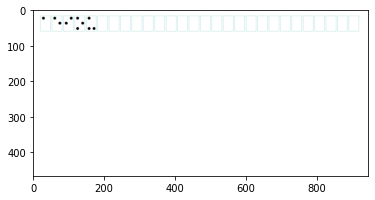

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/imagens_atractor"

imagens = [
           keras_ocr.tools.read(os.path.join(path,img)) for img in os.listdir(path)
]
imagens = np.array(imagens) 
plt.imshow(imagens[19])
print(gabaritos[19])

In [ ]:
gab_imagens = {}
for i in range(gabarito.size):
    gab_imagens[gabarito[i]] = imagens[i]

In [ ]:
def get_train_val_test_split(arr):
    train, valtest = sklearn.model_selection.train_test_split(arr, train_size=0.8, random_state=42)
    val, test = sklearn.model_selection.train_test_split(valtest, train_size=0.5, random_state=42)
    return train, val, test

In [ ]:
gabaritos_splits = get_train_val_test_split(gabaritos)
imagens_splits = get_train_val_test_split(imagens)

⠏⠗⠕⠉⠑⠎⠎⠁⠍⠑⠝⠞⠕ ⠙⠊⠛⠊⠞⠁⠇ ⠙⠑ ⠊⠍⠁⠛⠑⠝⠎


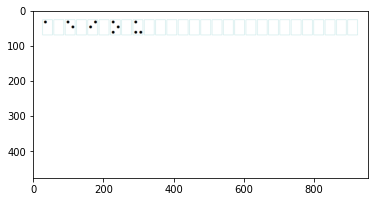

In [ ]:
plt.imshow(imagens_splits[0][10])
print(gabaritos_splits[0][10])

In [ ]:
detector = keras_ocr.detection.Detector(weights='clovaai_general')
recognizer = keras_ocr.recognition.Recognizer(
    alphabet=braille_ordenado,
    weights='kurapan'
)
recognizer.compile()
for layer in recognizer.backbone.layers:
    layer.trainable = False

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5


In [ ]:
data_dir = '.'
detector_batch_size = 1
# Gerando um diretório com a data e o horário que a celula foi rodada
detector_basepath = os.path.join(data_dir, f'detector_{datetime.datetime.now().isoformat()}')

# Treinando o modelo detector
detector.model.fit(
    # Conjunto de treinamento
    imagens_splits[0],
    # Utilizando o tamanho do conjunto de treinamento de backgrounds para defi-
    # nir os passos por época
    steps_per_epoch=math.ceil(len(imagens_splits[0]) / detector_batch_size),
    # Quantidade de épocas
    epochs=1,
    workers=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(restore_best_weights=True, patience=5),
        tf.keras.callbacks.CSVLogger(f'{detector_basepath}.csv'),
        tf.keras.callbacks.ModelCheckpoint(filepath=f'{detector_basepath}.h5')
    ],
    validation_data=imagens_splits[1],
    validation_steps=math.ceil(len(imagens_splits[1]) / detector_batch_size),
    batch_size=detector_batch_size
)

ValueError: ignored